<a href="https://www.kaggle.com/code/unaxarregiballestero/modelos-reconocimiento-facial?scriptVersionId=227001279" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## MODELOS DE RECONOCIMIENTO FACIAL
En este notebook exploraremos el funcionamiento de los tres modelos propuestos en la tarea del reconocimiento de caras. Los metodos de eigenfaces y eogenfaces bayesiano se analizaran en la base de datos de Yale B y en la de CasiaWebFaces, y el de CNN se usará solo para la base de datos de Casia.
Las funciones usadas en los metodos basados en PCA están en los archivos de eigenfaces_utils.
La optimización de parametros en los metodos de PCA se llevan a cabo en el archivo separado de cross_validation.

In [1]:
'Carga de imagenes'

import numpy as np
import sys
sys.path.append("/kaggle/input/modelospca/other/default/1/")
from eigenfaces_utils import load_images
training_ratio = 0.8
image_size = (130, 130) 
# DB Casia
data = np.load("/kaggle/input/casiawebfaces/casiafull.npz")
train_images, test_images, train_labels, test_labels = data["train_images"], data["test_images"],data["train_labels"],data["test_labels"]
train_images, test_images = np.array(train_images), np.array(test_images)

print("Carga finalizada")

Carga finalizada


In [ ]:
'METODO MEDIANTE PCA'
from eigenfaces_utils import project_images,predict_single_image
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
num_components = 350 #Numero de components proyectados en el espacio de eigenfaces

# Calcular eigenfaces
#eigenfaces, mean= compute_eigenfaces(train_images,image_size)
#np.savez("C:/Users/Unax/Desktop/LegacyTFG/Database/eigenfaces_NEW.npz", eigenfaces=eigenfaces, mean=mean)
#data = np.load("/kaggle/input/eigencasia200/eigenfaces_CASIAn200.npz")
#eigenfaces,mean=data["eigenfaces"], data["mean"]
def compute_eigenfaces(train_images, image_size,batch_size, n_components):
    N, h, w = len(train_images), image_size[0], image_size[1]
    X = np.reshape(train_images, (N, h * w))  # Convertimos a matriz 2D (N, d)

    mean = np.mean(X, axis=0)  # Calculamos la media
    X_std = X - mean  # Centramos los datos

    ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
    ipca.fit(X_std)  # Ajustamos PCA en lotes pequeños

    eigenfaces = ipca.components_  # Eigenfaces obtenidas

    return eigenfaces, mean
print("Entrenamiento finalizado") 
num_components_values = [350]
# Seleccionar subconjunto de test variado
test_sample_size = min(500, len(test_images)) 
selected_indices = random.sample(range(len(test_images)), test_sample_size)
test_images_sample = [test_images[i] for i in selected_indices]
test_labels_sample = [test_labels[i] for i in selected_indices]

accuracies = []

# Evaluación para diferentes valores de num_components
for num_components in num_components_values:
    print(f"Evaluando para num_components = {num_components}")
    eigenfaces, mean= compute_eigenfaces(train_images,image_size,batch_size=500, n_components=350)
    trainE = project_images(train_images, mean, eigenfaces, num_components, image_size)
    
    predicted_labels = [predict_single_image(img, mean, eigenfaces, trainE, train_labels, image_size, num_components) 
                        for img in test_images_sample]
    accuracy = np.mean(np.array(predicted_labels) == np.array(test_labels_sample))
    accuracies.append(accuracy)
    print(f"Accuracy para {num_components} componentes: {accuracy * 100:.2f}%")

# Graficar resultados
plt.figure(figsize=(8, 6))
plt.plot(num_components_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Componentes')
plt.ylabel('Exactitud')
plt.title('Exactitud en función del Número de Componentes')
plt.grid()
plt.show()



Entrenamiento finalizado
Evaluando para num_components = 350


In [3]:
'METODO MEDIANTE PCA BAYESIANO'
import numpy as np
import os
from PIL import Image
import sys
sys.path.append("/kaggle/input/modelospca/other/default/1/")
from eigenfaces_bayes_utils import calculate_class_statistics, load_images, compute_eigenfaces, project_images,predict_single_image_bayes

num_components = 30 
 #Calcular eigenfaces
#eigenfaces, mean = compute_eigenfaces(train_images,image_size)
#np.savez("D:/Universidad/TFG IE/Legacy code/Database/eigenfaces_PCAfull.npz", eigenfaces=eigenfaces, mean=mean)
#data = np.load("/kaggle/input/eigencasia200/eigenfaces_CASIAn200.npz")
#eigenfaces,mean=data["eigenfaces"], data["mean"]
print("Entrenamiento finalizado") 
# Proyectar imágenes de entrenamiento
trainE = project_images(train_images, mean, eigenfaces, num_components,image_size)

# Calcular estadísticas de las clases
class_means, class_covariances = calculate_class_statistics(trainE, train_labels)
print("Proyeccion y stats finalizado") 
# Evaluación del modelo
correct= 0
incorrect=0

for img, actual_label in zip(test_images, test_labels):
    predicted_label = predict_single_image_bayes(img, mean, eigenfaces, class_means, class_covariances, image_size, num_components)
    if predicted_label == actual_label:
        correct += 1
        print("epiko")
    else:
        incorrect += 1
        print("basuraaaa")
    #print(f"Actual: {actual_label}, Predicted: {predicted_label}")
    
accuracy = correct / (correct + incorrect)
print(f"Accuracy: {accuracy * 100:.2f}%")

Carga finalizada
Entrenamiento finalizado
Proyeccion y stats finalizado
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
epiko
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
epiko
basuraaaa
epiko
epiko
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
epiko
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
epiko
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
epiko
basuraaaa
basuraaaa
basuraaaa
epiko
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
epiko
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
epiko
basuraaaa
basuraaaa
basuraaaa
basuraaaa
epiko
basuraaaa
epiko
basuraaaa
basuraaaa
basuraaaa
basuraaaa
epiko
basuraaaa
basuraaaa
epiko
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basuraaaa
basu

KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 130, 130, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 65, 65, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 65, 65, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 534)                 │         273,942 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,601,494 (70.96 MB)

 Trainable params: 18,601,494 (70.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1183/1183 ━━━━━━━━━━━━━━━━━━━━ 147s 113ms/step - accuracy: 0.0037 - loss: 6.2468 - val_accuracy: 0.0066 - val_loss: 6.1675 - learning_rate: 0.0100
Epoch 2/80
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 115s 96ms/step - accuracy: 0.0083 - loss: 6.1164 - val_accuracy: 0.0197 - val_loss: 5.7616 - learning_rate: 0.0100
Epoch 3/80
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 115s 97ms/step - accuracy: 0.0145 - loss: 5.8628 - val_accuracy: 0.0392 - val_loss: 5.4384 - learning_rate: 0.0100
Epoch 4/80
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 114s 96ms/step - accuracy: 0.0223 - loss: 5.6696 - val_accuracy: 0.0589 - val_loss: 5.0832 - learning_rate: 0.0100
Epoch 5/80
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 115s 96ms/step - accuracy: 0.0342 - loss: 5.3975 - val_accuracy: 0.0959 - val_loss: 4.5943 - learning_rate: 0.0100
Epoch 6/80
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 114s 96ms/step - accuracy: 0.0497 - loss: 5.0871 - val_accuracy: 0.1372 - val_loss: 4.2872 - learning_rate: 0.0100
Epoch 7/80
1183/1183 ━━━━━━━━━━━━━━━━━━━━ 114s 96ms/step - accuracy:

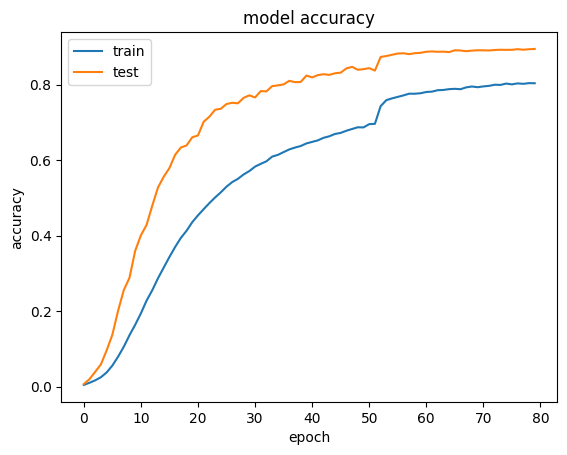

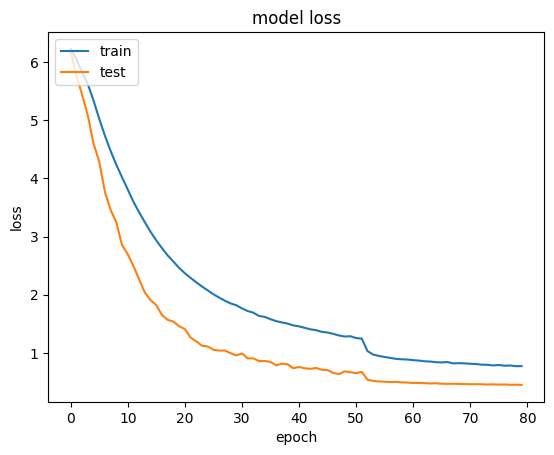

In [1]:
'METODO MEDIANTE CNN'

# Importar las librerías necesarias
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Preprocesamiento de imágenes
image_size = (130, 130)
input_shape = (130, 130, 1)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Ajustar las dimensiones para tener un canal (escala de grises)
train_images = train_images.reshape(-1, image_size[0], image_size[1], 1)
test_images = test_images.reshape(-1, image_size[0], image_size[1], 1)

# Convertir las etiquetas de texto a enteros y luego a one-hot encoding
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)
num_classes = len(np.unique(train_labels))
train_labels = keras.utils.to_categorical(train_labels, num_classes=num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes=num_classes)

# Definir el modelo CNN

model = keras.models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


# Compilar el modelo
#optimizer = Adam(learning_rate=0.001)
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

# Resumen del modelo
model.summary()

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear (pérdida en el conjunto de validación)
    patience=10,         # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True,
    mode='min'  # Restaurar los mejores pesos encontrados
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Métrica a monitorear
    factor=0.1,          # Factor por el cual se reduce la tasa de aprendizaje
    patience=4,         # Número de épocas sin mejora antes de reducir la tasa de aprendizaje
    min_lr=0.00001,
    mode='min'      
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
#DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(train_images, train_labels, batch_size=64)
history = model.fit(
    train_generator,
    epochs=80,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping, reduce_lr]
)

#

"""

# Entrenar el modelo con callbacks
history = model.fit(
    train_images, train_labels,
    batch_size=64,
    epochs=80,  # Número máximo de épocas (puede detenerse antes debido al early stopping)
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping, reduce_lr]  # Añadir los callbacks aquí
)"""
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

# Guardar el modelo entrenado
model.save("/kaggle/working/modelo_CASIAV2_AUGSGD.keras")
#modelo_cargado = keras.models.load_model("modelo_reconocimiento_facial.h5")
#predicciones = modelo_cargado.predict(test_images)

#Plot the result
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
